# 필요 라이브러리 불러오기

## 라이브러리 불러오기 전
- pip install opencv-python 을 입력하여 설치하기

In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image
from os import listdir as ld

# 필요 모델 들고오기 - VGG16

In [3]:
vgg_model = VGG16(weights='imagenet', include_top=False)

## 마지막 컨볼루션 레이어의 출력으로 새 모델 생성

In [4]:
# Create a new model with the output of the last convolutional layer
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)

In [5]:
import keras.utils as utils #이미지를 불러오기 위해 필요한 package

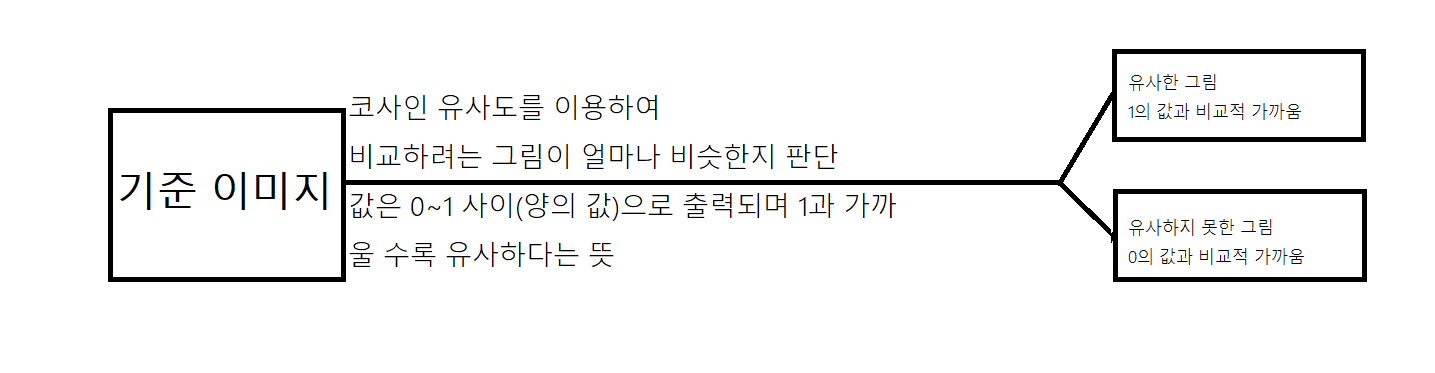

In [64]:
Image('C:/Users/admin/Desktop/simpic/a.png')

# 기준이 될 이미지 불러오기
- 첫 번째 이미지를 로드하고 VGG용으로 사전 처리

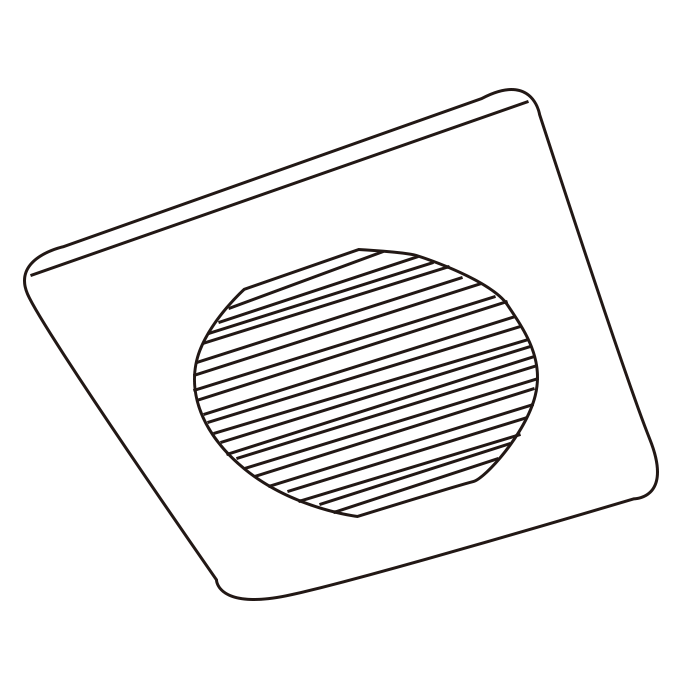

In [8]:
Image("C:\\Users\\admin\\Desktop\\새 폴더 (2)\\2배기\\s_0038_24899_408276.png")

In [9]:
# Load the first image and preprocess it for VGG
img1 = utils.load_img("C:\\Users\\admin\\Desktop\\새 폴더 (2)\\2배기\\s_0038_24899_408276.png", target_size=(224, 224))
img1 = utils.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)

## 첫 번째 이미지에서 형상 추출

In [10]:
# Extract features from the first image
features1 = model.predict(img1)
features1 = features1.flatten()

1/1 [==============================] - 0s 394ms/step


# 비교 이미지(positive)불러오기

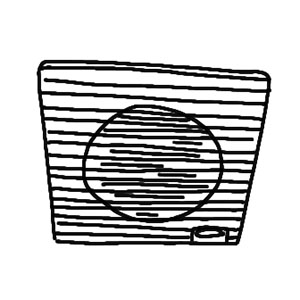

In [11]:
Image("C:\\Users\\admin\\Desktop\\새 폴더 (2)\\2배기\긍적\\s_0038_24883_610516.jpg")

In [12]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("C:\\Users\\admin\\Desktop\\새 폴더 (2)\\2배기\긍정\\s_0038_24883_610516.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [13]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 169ms/step


In [14]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## positive image cosine similarity

In [15]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.27506816


# 비교 이미지(negative) 불러오기

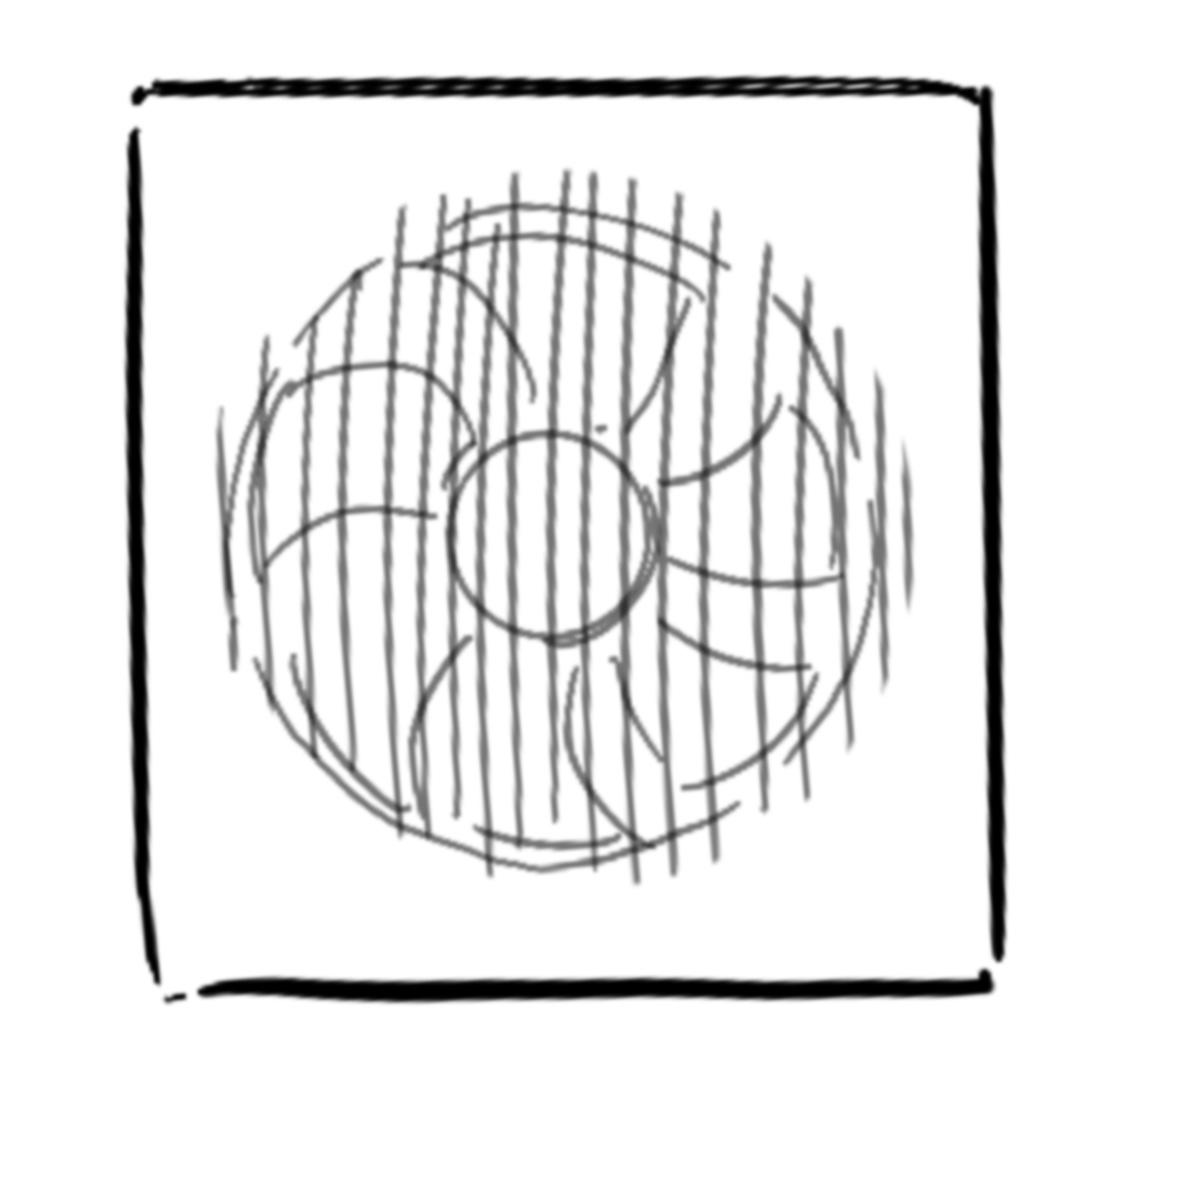

In [16]:
Image("C:\\Users\\admin\Desktop\\새 폴더 (2)\\2배기\부정\\s_0038_24887_620467.jpg")

In [18]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("C:\\Users\\admin\Desktop\\새 폴더 (2)\\2배기\부정\\s_0038_24887_620467.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [19]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 189ms/step


In [20]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## negative

In [21]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.32642108


# 함수

In [22]:
def cos_sim(list, mod='positive'):
    positive_sim=[]
    negative_sim=[]
    for i in (list):
        img2 = utils.load_img(i, target_size = (224, 224))
        img2 = utils.img_to_array(img2)
        img2 = np.expand_dims(img2, axis=0)
        img2 = preprocess_input(img2)
        features2 = model.predict(img2)
        features2 = features2.flatten()
        cos_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
        if mod == 'positive':
            positive_sim.append(cos_similarity)
        elif mod == 'negative':
            negative_sim.append(cos_similarity)
        else:
            print('함수 잘못 사용함')
    if mod == 'positive':
        print('POSITIVE')
        posi_sim_df = pd.DataFrame(positive_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(positive_sim), min(positive_sim),
                                                                   (sum(positive_sim)/len(positive_sim)), posi_sim_df.median(axis=0)))
        
        posi_sim_df.to_csv('positive.csv')
        return posi_sim_df
    else:
        print('NEGATIVE')
        nega_sim_df = pd.DataFrame(negative_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(negative_sim), min(negative_sim),
                                                                   (sum(negative_sim)/len(negative_sim)), nega_sim_df.median(axis=0)))
        nega_sim_df.to_csv('negative.csv')
        return nega_sim_df

In [30]:
nega_dir = 'C:\\Users\\admin\Desktop\\새 폴더 (2)\\2배기\\부정'
posi_dir = 'C:\\Users\\admin\\Desktop\\새 폴더 (2)\\2배기\\긍정'

nega_list = [nega_dir+'\\'+f for f in(ld(nega_dir))]
posi_list = [posi_dir+'\\'+f for f in(ld(posi_dir))]

In [31]:
print(nega_list[0])
print(posi_list[0])

C:\Users\admin\Desktop\새 폴더 (2)\2배기\부정\s_0038_24774_170571.jpg
C:\Users\admin\Desktop\새 폴더 (2)\2배기\긍정\s_0038_24883_352043.png


In [32]:
cos_sim(nega_list, 'negative')

1/1 [==============================] - 0s 137ms/step
NEGATIVE
최대 유사도: 0.54, 최소 유사도: 0.14, 평균 유사도: 0.25, 중앙 유사도: 0.22


,0
0,0.231036
1,0.143448
2,0.210056
3,0.205051
4,0.240930
...,...
92,0.493470
93,0.429040
94,0.404526
95,0.458039


In [33]:
cos_sim(posi_list)

1/1 [==============================] - 0s 152ms/step
POSITIVE
최대 유사도: 0.55, 최소 유사도: 0.22, 평균 유사도: 0.36, 중앙 유사도: 0.36


,0
0,0.229585
1,0.403054
2,0.278819
3,0.288906
4,0.329008
5,0.228136
6,0.449088
7,0.222612
8,0.275068
9,0.553047


# 완전 다른 이미지01

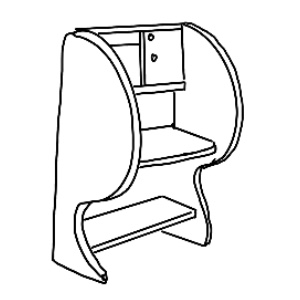

In [46]:
Image('C:/Users/admin/Desktop/simpic/6.jpg')

In [47]:
# Load the second image and preprocess it for VGG
img2 = image.load_img('C:/Users/admin/Desktop/simpic/6.jpg', target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [48]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 136ms/step


In [49]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [50]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.21409264


# 완전 다른 이미지 02

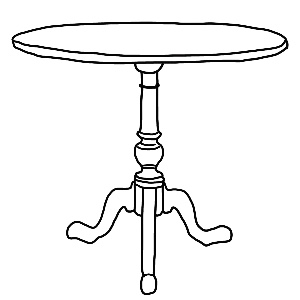

In [51]:
Image('C:/Users/admin/Desktop/simpic/8.jpg')

In [52]:
# Load the second image and preprocess it for VGG
img2 = image.load_img('C:/Users/admin/Desktop/simpic/8.jpg', target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [53]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 134ms/step


In [54]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [55]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.16533415


# 완전 다른 이미지03

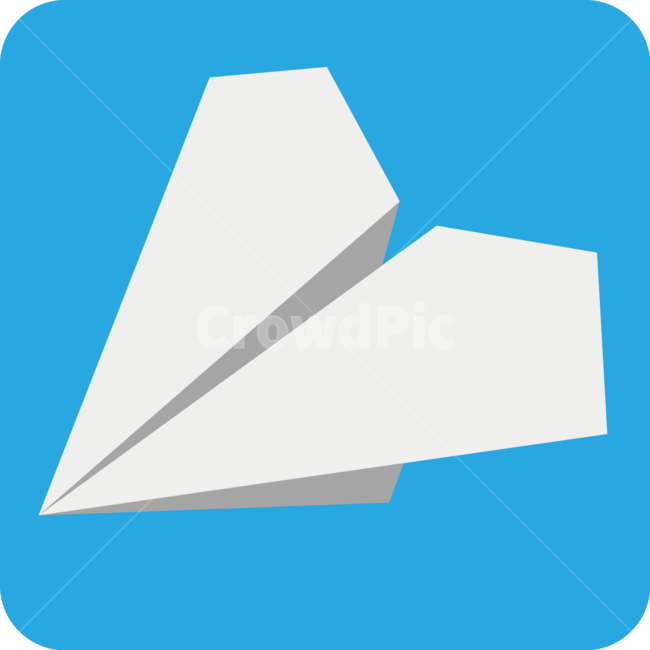

In [57]:
Image('C:/Users/admin/Desktop/simpic/9.png')

In [58]:
# Load the second image and preprocess it for VGG
img2 = image.load_img('C:/Users/admin/Desktop/simpic/9.png', target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [59]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 310ms/step


In [60]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [61]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.14307235
